In [1]:
import numpy as np
from numpy import exp
from scipy.special import jn_zeros, j0, j1
import matplotlib.pyplot as plt
import fipy as fp

In C:\Users\antoine\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\antoine\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\antoine\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\antoine\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\antoine\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

Équation de la chaleur 
\begin{equation}
\rho C \frac{\partial T}{\partial t}=\lambda \frac{\partial^2T}{\partial x^2}
\end{equation}

In [2]:
#constantes
global a
global D
global Nterm
Ti=20#°C initiale de la spaghetti
Tc=70#°C cuisson de la spaghetti
Te=100#°C eau choode
Lp=250#longueur d'une pate
a=1#rayon d'une patte
h=21#J/K/kg
c=2.9#j/kg/K
lambdaa= 0.16#W/m/K
#1m3=10**6cm3
rho=0.75*10**(3)#masse volumique kg/m3
#Blé 305 14,7 0,16 Masse volumique : 0,75 g/cm3 ; [35]
Nterm = 20
#pour fipy
dr=0.1#increment spacial
nr=10#nombre de cellules?
Lr=1#rayon du domaine
D=lambdaa/(rho*c)

In [3]:
def crank522(r, t):
    '''evaluate eqn 5.22 for a given r,t

    the following global variables need to be set
    a : radius of cylinder
    D : diffusion coefficient
    Nterm : number of terms to be evaluated
    '''
    T0=100
    T1=20
    aalp = jn_zeros(0,Nterm)
    alpha = aalp/a

    XJ0 = exp(-D * alpha**2 * t) * j0(r*alpha)
    AJ1 = alpha * j1(aalp)

    S = np.sum(XJ0/AJ1)
    T=T0-(T0-T1)*2*S/a
    return T

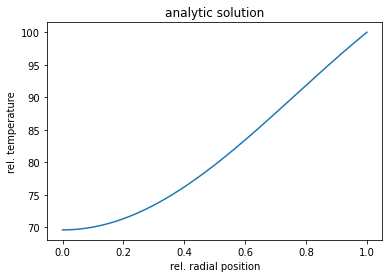

3380 70.05665429043304


In [4]:
# create radial axis
r = np.linspace(0.,1.,200)
# evaluate crank522 at different points in time, and plot
t=0
dt=20
c = np.array([crank522(rr,t) for rr in r])
while c[Nterm]<70:
    t+=dt
    c = np.array([crank522(rr,t) for rr in r])
plt.plot(r,c)
plt.xlabel('rel. radial position')
plt.ylabel('rel. temperature')
plt.title('analytic solution')
plt.show()
print(t,c[Nterm])